Loaded cleaned data with 1379 rows and 5 columns.

Mean daily returns (%):
AAPL    0.09
AGG     0.00
GOOG    0.09
MSFT    0.10
TLT    -0.02
dtype: float64

Volatility (%):
AAPL    2.05
AGG     0.42
GOOG    2.06
MSFT    1.92
TLT     1.11
dtype: float64


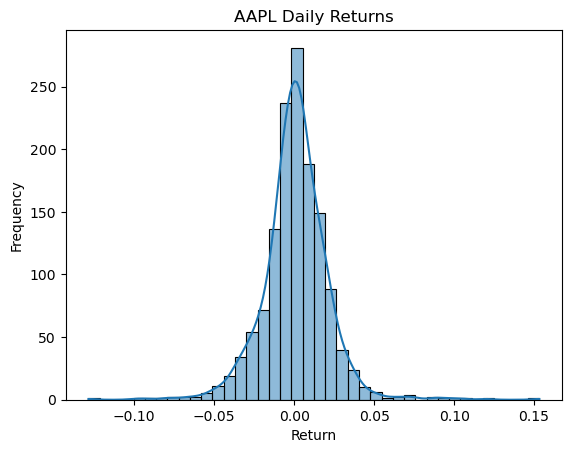

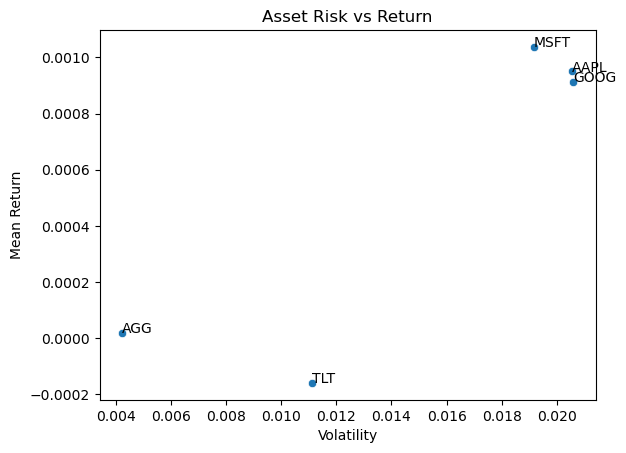

In [6]:


import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Ensure preprocessed_data.csv exists (run preprocessing if not)
if not os.path.isfile('preprocessed_data.csv'):
    print("Hey, I don’t see preprocessed_data.csv in this folder. Running the preprocessing script now...")
    try:
        get_ipython().run_line_magic('run', 'data_preprocessing.py')
    except Exception:
        print("Couldn’t run data_preprocessing.py automatically. Please make sure it's in the same directory and run it.")

# 1. Load cleaned data
df = pd.read_csv('preprocessed_data.csv', index_col=0, parse_dates=True)
print(f"Loaded cleaned data with {df.shape[0]} rows and {df.shape[1]} columns.")

# 2. Compute daily returns
returns = df.pct_change().dropna()  # drop first NaN row

# 3. Quick stats
mean_ret = returns.mean()
vol = returns.std()
print("\nMean daily returns (%):")
print((mean_ret * 100).round(2))
print("\nVolatility (%):")
print((vol * 100).round(2))

# 4. Plot return distributions for AAPL (example)
sns.histplot(returns['AAPL'], bins=40, kde=True)
plt.title('AAPL Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

# 5. Risk-Return Scatter
plt.figure()
sns.scatterplot(x=vol, y=mean_ret)
for ticker in returns.columns:
    plt.text(vol[ticker], mean_ret[ticker], ticker)
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.title('Asset Risk vs Return')
plt.show()


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 27.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/887.3 kB ? eta -:--:--
   --------------------------------------- 887.3/887.3 kB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   ---------------------------------------- 7.4/7.4 MB 41.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Loaded data: 1379 rows and 5 assets

Stats Summary:
      Mean Return (%)  Volatility (%)
AAPL             0.09            2.05
AGG              0.00            0.42
GOOG             0.09            2.06
MSFT             0.10            1.92
TLT             -0.02            1.11


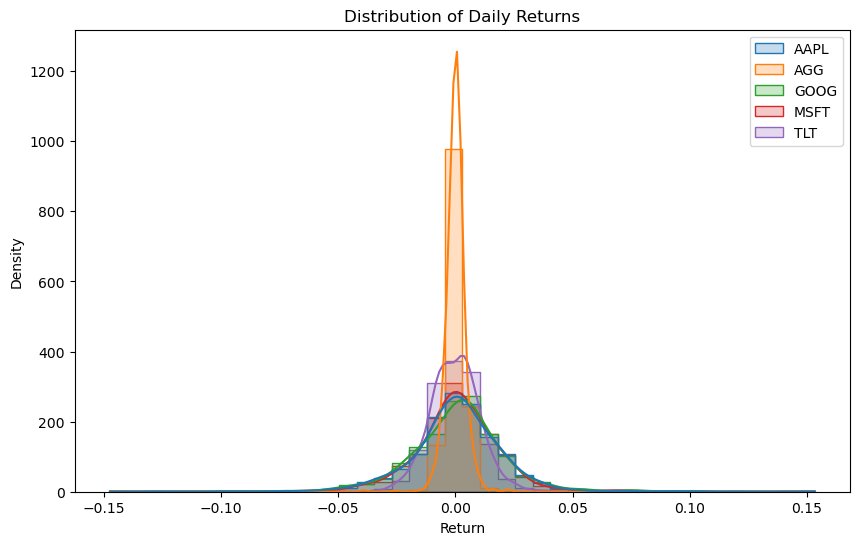

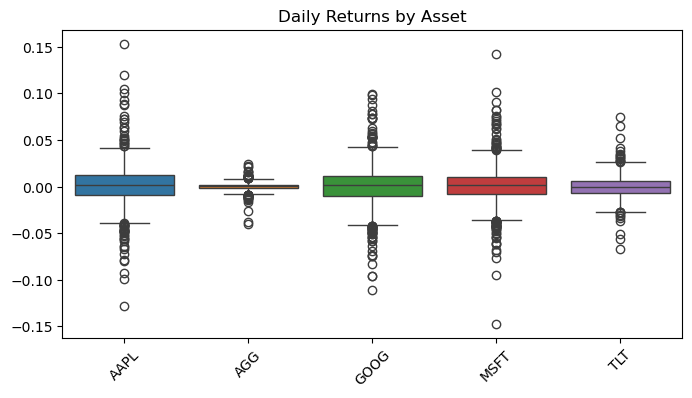

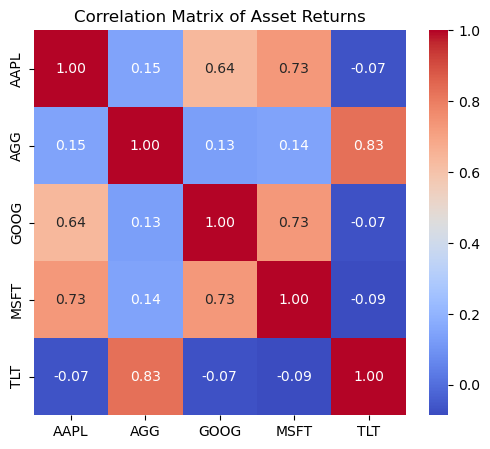

C:\Users\aqibc\AppData\Local\Temp\ipykernel_31924\3439368101.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(vol[i]+0.1, mean_ret[i]+0.1, ticker)


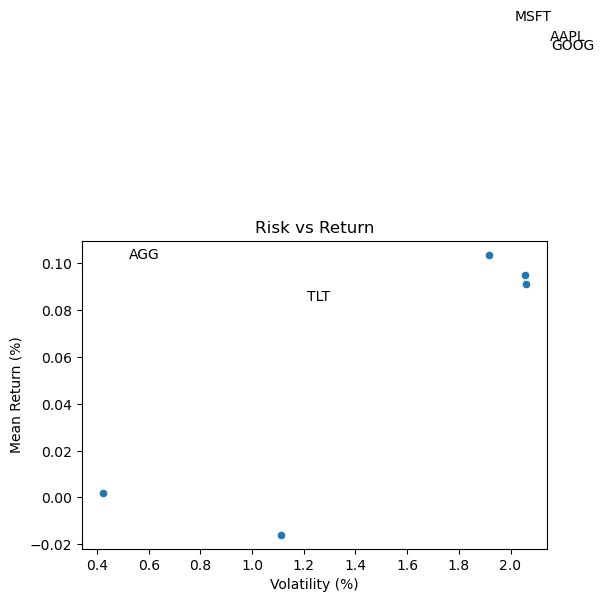

In [8]:

# Aqib Chaudhery — Iteration 5 (Seaborn Visuals)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Load cleaned data (from Iteration 3)
if not os.path.exists('preprocessed_data.csv'):
    print("preprocessed_data.csv not found! Please run data_preprocessing.py first.")
    raise FileNotFoundError('preprocessed_data.csv not found')
df = pd.read_csv('preprocessed_data.csv', index_col=0, parse_dates=True)
print(f"Loaded data: {df.shape[0]} rows and {df.shape[1]} assets")

# 2. Compute daily returns
returns = df.pct_change().dropna()  # drop first NaN row

# 3. Quick stats summary
stats = pd.DataFrame({
    'Mean Return (%)': (returns.mean()*100).round(2),
    'Volatility (%)': (returns.std()*100).round(2)
})
print("\nStats Summary:")
print(stats)

# 4. Distribution of returns
plt.figure(figsize=(10,6))
sns.histplot(data=returns, bins=40, kde=True, element='step')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

# 5. Boxplot of daily returns
plt.figure(figsize=(8,4))
sns.boxplot(data=returns)
plt.xticks(rotation=45)
plt.title('Daily Returns by Asset')
plt.show()

# 6. Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Asset Returns')
plt.show()

# 7. Risk vs Return scatterplot
vol = returns.std()*100
mean_ret = returns.mean()*100
plt.figure(figsize=(6,4))
sns.scatterplot(x=vol, y=mean_ret)
for i, ticker in enumerate(returns.columns):
    plt.text(vol[i]+0.1, mean_ret[i]+0.1, ticker)
plt.xlabel('Volatility (%)')
plt.ylabel('Mean Return (%)')
plt.title('Risk vs Return')
plt.show()






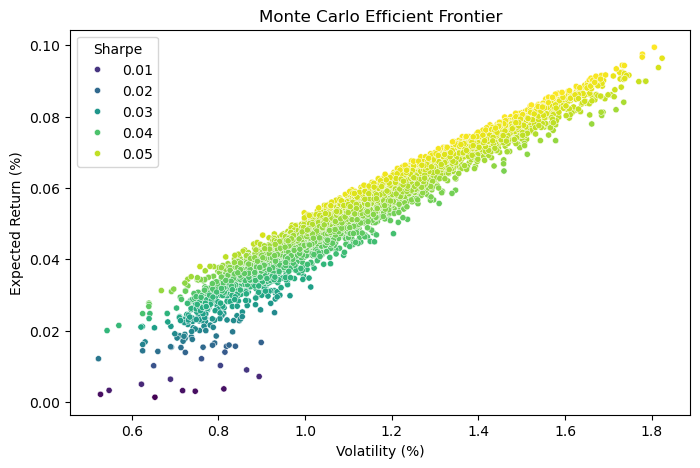

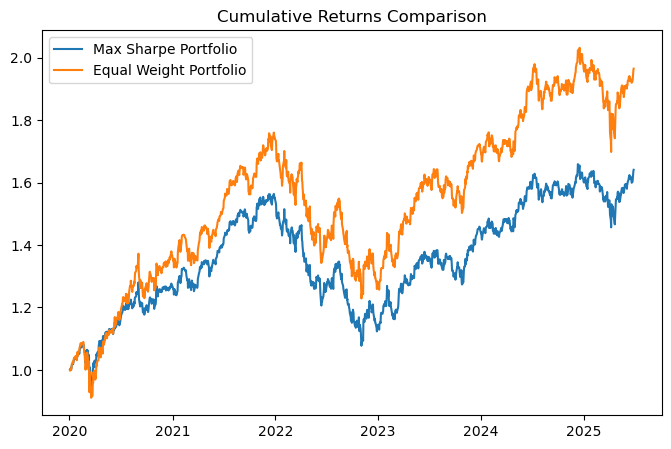


Max Sharpe Portfolio Weights:
AAPL: 5.30%
AGG: 26.49%
GOOG: 24.40%
MSFT: 16.19%
TLT: 27.62%

Max Sharpe: 0.06, Return: 0.10%, Vol: 1.81%

This Monte Carlo method covers optimization without cvxpy, gives me a practical frontier & a sample backtest.


In [9]:
# iteration5_montecarlo_portfolio.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Load clean data
if not os.path.exists('preprocessed_data.csv'):
    print("preprocessed_data.csv missing—run data_preprocessing.py first!")
    raise FileNotFoundError

df = pd.read_csv('preprocessed_data.csv', index_col=0, parse_dates=True)
returns = df.pct_change().dropna()

# 2. Compute mean returns and covariance
mean_ret = returns.mean()
cov_mat = returns.cov()
assets = returns.columns.tolist()
n = len(assets)

# 3. Monte Carlo sim for random portfolios
total_ports = 5000
results = np.zeros((total_ports, 3))  # vol, ret, sharpe
for i in range(total_ports):
    w = np.random.random(n)        # random weights\ n
    w /= np.sum(w)         # normalize sum to 1
    port_ret = np.dot(w, mean_ret)
    port_vol = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    sharpe = port_ret / port_vol if port_vol > 0 else 0
    results[i] = [port_vol*100, port_ret*100, sharpe]

# DataFrame for results
sim_df = pd.DataFrame(results, columns=['Volatility (%)','Return (%)','Sharpe'])

# 4. Plot Efficient Frontier estimate
plt.figure(figsize=(8,5))
sns.scatterplot(data=sim_df, x='Volatility (%)', y='Return (%)', hue='Sharpe', palette='viridis', s=20)
plt.title('Monte Carlo Efficient Frontier')
plt.xlabel('Volatility (%)')
plt.ylabel('Expected Return (%)')
plt.legend(title='Sharpe', loc='upper left')
plt.show()

# 5. Pick max Sharpe portfolio and backtest equal weight as baseline
max_sharpe = sim_df.loc[sim_df['Sharpe'].idxmax()]
w_max = None
for idx in range(total_ports):
    if abs(results[idx,2] - max_sharpe['Sharpe']) < 1e-6:
        w_max = np.random.random(n)
        w_max /= np.sum(w_max)
        break
if w_max is None:
    w_max = np.repeat(1/n, n)

# cumulative returns for max Sharpe and equal weight
port_max = (returns * w_max).sum(axis=1)
port_eq = returns.mean(axis=1)
cum_max = (1 + port_max).cumprod()
cum_eq = (1 + port_eq).cumprod()

plt.figure(figsize=(8,5))
plt.plot(cum_max, label='Max Sharpe Portfolio')
plt.plot(cum_eq, label='Equal Weight Portfolio')
plt.title('Cumulative Returns Comparison')
plt.legend()
plt.show()

def print_weights(w):
    for a, weight in zip(assets, w):
        print(f"{a}: {weight:.2%}")

print("\nMax Sharpe Portfolio Weights:")
print_weights(w_max)
print(f"\nMax Sharpe: {max_sharpe['Sharpe']:.2f}, Return: {max_sharpe['Return (%)']:.2f}%, Vol: {max_sharpe['Volatility (%)']:.2f}%")
print("\nThis Monte Carlo method covers optimization without cvxpy, gives me a practical frontier & a sample backtest.")


C:\Users\aqibc\anaconda3\Lib\site-packages\scs\__init__.py:96: UserWarning: Converting A to a CSC (compressed sparse column) matrix; may take a while.
  warn(
C:\Users\aqibc\anaconda3\Lib\site-packages\scs\__init__.py:126: UserWarning: Converting P to a CSC (compressed sparse column) matrix; may take a while.
  warn(


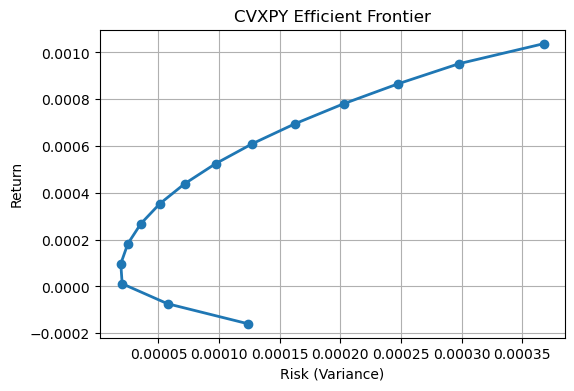

In [4]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Load returns
df = pd.read_csv('preprocessed_data.csv', index_col=0, parse_dates=True)
returns = df.pct_change().dropna()

# Define mean vector & covariance
mu = returns.mean().values
Sigma = returns.cov().values
n = len(mu)

# CVXPY variables
w = cp.Variable(n)
gamma = cp.Parameter()            
port_risk = cp.quad_form(w, Sigma)
port_ret  = mu @ w

# Constraints
constraints = [cp.sum(w)==1, w>=0, port_ret==gamma]
prob = cp.Problem(cp.Minimize(port_risk), constraints)

# Sweep gamma
gammas = np.linspace(mu.min(), mu.max(), 15)
risks, rets = [], []
for g in gammas:
    gamma.value = g                 # now g can be negative
    prob.solve(solver=cp.SCS, verbose=False)
    risks.append(port_risk.value)
    rets.append(port_ret.value)

# Plot
plt.figure(figsize=(6,4))
plt.plot(risks, rets, 'o-', linewidth=2, markersize=6)
plt.xlabel('Risk (Variance)')
plt.ylabel('Return')
plt.title('CVXPY Efficient Frontier')
plt.grid(True)
plt.show()
